# Analisis de la Evolucion de la Calidad de los Datos
## Información proveniente del Portal de Datos Abiertos del Estado Colombiano

**Integrantes**

- Claudia Viviana Arévalo Bernal
- Sergio Daniel Hernández Charpak
- Hugo Sin Triana

#### Librerias

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import datetime
import urllib
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
import platform
import ntpath
import os
import re

#### Localizacion

In [2]:
donde_estoy = %pwd

In [3]:
%cd $donde_estoy

/home/laptop/Documentos/LSST/CAD/Entrega_3


#### Lectura de los datos

In [7]:
plataforma_operativa = platform.system()
if(plataforma_operativa=='Windows'):
    carpeta_datos = "Datos\Secop_Consolidado\ "
    #archivo_datos = carpeta_datos + r"\10_-_SECOP_I_-_2011_2014.csv"
    #secop = pd.read_csv(archivo_datos, encoding='utf-8')
    #archivo_datos_limpio = carpeta_datos + r"\10_-_SECOP_I_-_2011_2014_v5.csv"
    #perfilamiento_datos_limpios = carpeta_datos + r"\Perfilamiento_Datos_SECOP_I_-_2011_2014_v5.html"
elif(plataforma_operativa=='Linux'):
    carpeta_datos = "Datos/Secop_Consolidado/"
    #archivo_datos = carpeta_datos + "SECOP_I_-_Consolidado.csv"
    #secop = pd.read_csv(archivo_datos, encoding='utf-8')
    #archivo_datos_limpio = carpeta_datos + "SECOP_I_-_Consolidado_clean.csv"
    #perfilamiento_datos_limpios = carpeta_datos + "Perfilamiento_Datos_SECOP_I_-__Consolidado_clean.html"

In [8]:
%ls $carpeta_datos

SECOP_I_-_Consolidado.csv  SECOP_II_-_Consolidado.csv
SECOP_I_-_Consolidado.txt  SECOP_II_-_Consolidado.txt


In [9]:
archivo_Secop_I = carpeta_datos + "SECOP_I_-_Consolidado.txt"
archivo_Secop_II = carpeta_datos + "SECOP_II_-_Consolidado.txt"

In [10]:
def readFirstLine(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
        return first_line

In [11]:
def processed_Secop_by_year_file(processed_secop_file):
    name_file = ntpath.basename(processed_secop_file)
    directory = ntpath.dirname(processed_secop_file) + ntpath.altsep
    shape_year = readFirstLine(processed_secop_file)
    shape_year = re.sub('[()]', '', shape_year)
    shape_year = shape_year.strip('\n')
    shape_sting_array = shape_year.split(",")
    shape_year = [int(numeric_string) for numeric_string in shape_sting_array]
    n_rows, n_columns = shape_year[0], shape_year[1]
    #Ahora vienen n_columns de d_types y n_columns de nulls + 1 lineas
    with open(processed_secop_file) as f:
        content = f.readlines()
        n_duplicates_year =  int(content[2*n_columns + 2:][0].strip('\n'))
        n_nulls_year = int(content[2*n_columns + 2:][1].strip('\n'))
        dtypes_year = content[1:n_columns+1]
        nulls_column = content[n_columns+1:2*n_columns+2]
        return n_rows, n_columns, n_duplicates_year, n_nulls_year, dtypes_year, nulls_column

#### 2011 - 2016

In [13]:
n_rows_SECOP_I, n_columns_SECOP_I, n_duplicates_SECOP_I, n_nulls_SECOP_I, dtypes_SECOP_I, nulls_column_SECOP_I = processed_Secop_by_year_file(archivo_Secop_I)
n_rows_SECOP_II, n_columns_SECOP_II, n_duplicates_SECOP_II, n_nulls_SECOP_II, dtypes_SECOP_II, nulls_column_SECOP_II = processed_Secop_by_year_file(archivo_Secop_II)

### Evolucion de las distintas cantidades calculades en el tiempo 2011 - 2016
Se mira la evolucion de:
1. **# de registros**
2. **# de variables**
3. **# de registros vacios**
4. **# de registros duplicados**

In [15]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [26]:
years = np.array([2011, 2012])
objects = ('Secop I', 'Secop II')
n_columns = np.array([n_columns_SECOP_I, n_columns_SECOP_II])
n_rows = np.array([n_rows_SECOP_I, n_rows_SECOP_II])
n_nulls = np.array([n_nulls_SECOP_I, n_nulls_SECOP_II])
n_duplicates = np.array([n_duplicates_SECOP_I, n_duplicates_SECOP_II])

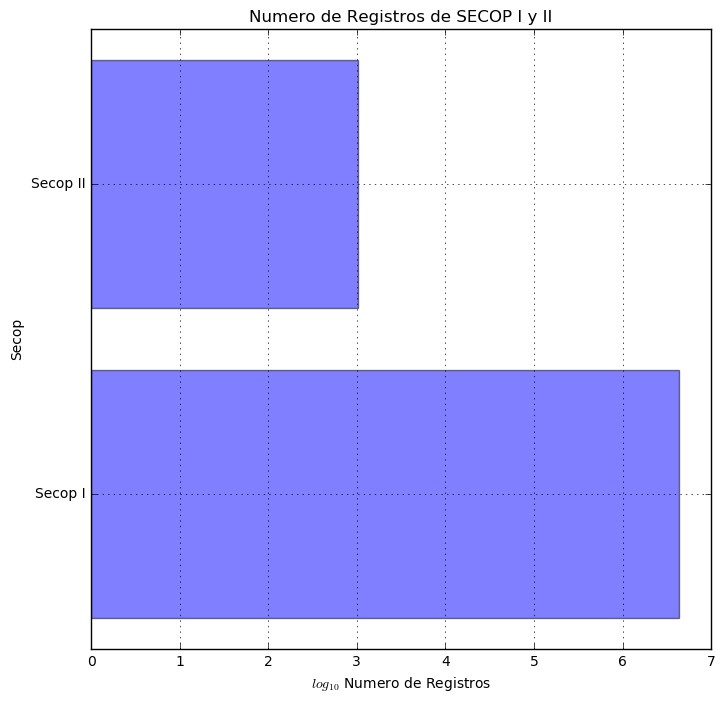

In [27]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,np.log10(n_rows), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Secop')
plt.xlabel('$log_{10}$ Numero de Registros')
plt.title('Numero de Registros de SECOP I y II')
plt.grid()
plt.show()

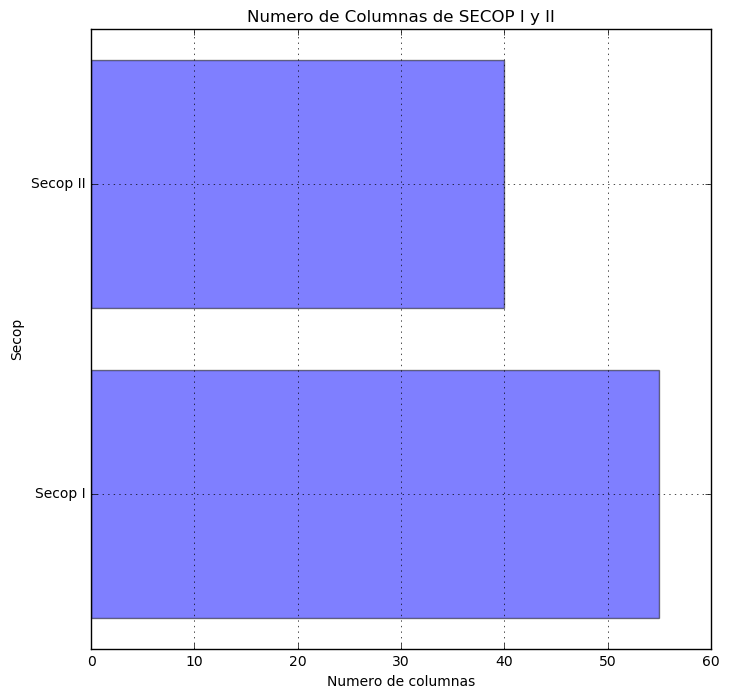

In [28]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,n_columns, align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Secop')
plt.xlabel('Numero de columnas')
plt.title('Numero de Columnas de SECOP I y II')
plt.grid()
plt.show()

In [29]:
for line in  (dtypes_SECOP_I):
    print (line.strip('\n'))

 Nivel Entidad                                      object
Orden Entidad                                      object
Nombre de la Entidad                               object
NIT de la Entidad                                  object
ID Tipo de Proceso                                 object
Estado del Proceso                                 object
Causal de Otras Formas de Contratacion Directa     object
ID Regimen de Contratacion                        float64
Regimen de Contratacion                            object
ID Objeto a Contratar                               int64
Objeto a Contratar                                 object
Detalle del Objeto a Contratar                     object
Tipo de Contrato                                   object
Municipio Obtencion                                object
Municipio Entrega                                  object
Municipios Ejecucion                               object
Fecha de Cargue en el SECOP                        object
Numero de Con

In [30]:
for line in  (dtypes_SECOP_II):
    print (line.strip('\n'))

 Entidad Compradora                object
NIT Entidad Compradora             int64
ID Proceso                        object
ID Solicitud de Proceso           object
Identificador Operación           object
Descripción Contrato              object
Modalidad Contratación            object
ID Contrato                       object
Tipo de Contrato                  object
Fecha Inicio Contrato             object
Fecha Fin Contrato                object
Fecha Inicio Ejecucion            object
Fecha Fin Ejecucion               object
Fecha Creación Contrato           object
Condiciones de Entrega            object
Entidad Proveedora                object
NIT Entidad Proveedora           float64
Es Grupo-Unión                    object
Estado Contrato                   object
Precio Base de la Propuesta       object
Valor Contrato                    object
Porcentaje Anticipo               object
Valor Anticipo                    object
Valor Facturado                   object
Código Categori

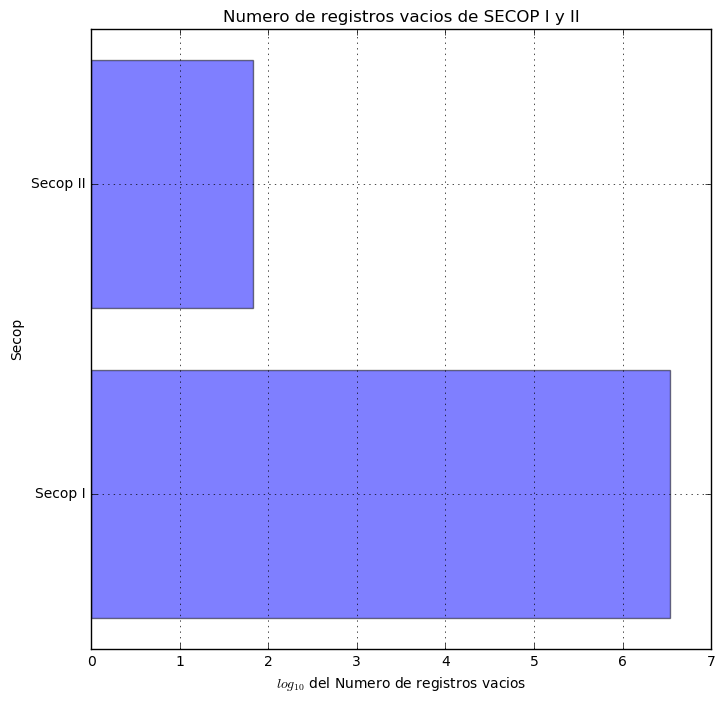

In [31]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,np.log10(n_nulls), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Secop')
plt.xlabel('$log_{10}$ del Numero de registros vacios')
plt.title('Numero de registros vacios de SECOP I y II')
plt.grid()
plt.show()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


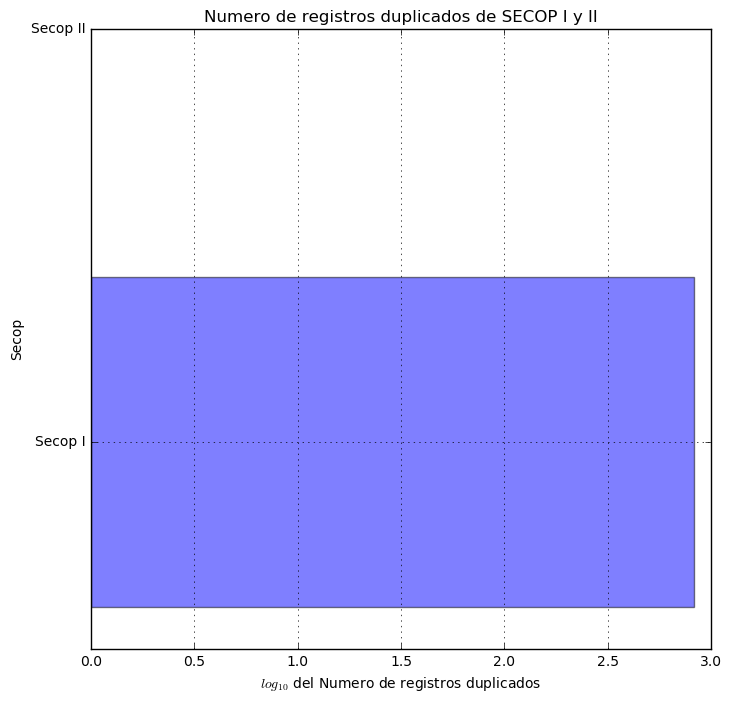

In [32]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,np.log10(n_duplicates), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Secop')
plt.xlabel('$log_{10}$ del Numero de registros duplicados')
plt.title('Numero de registros duplicados de SECOP I y II')
plt.grid()
plt.show()

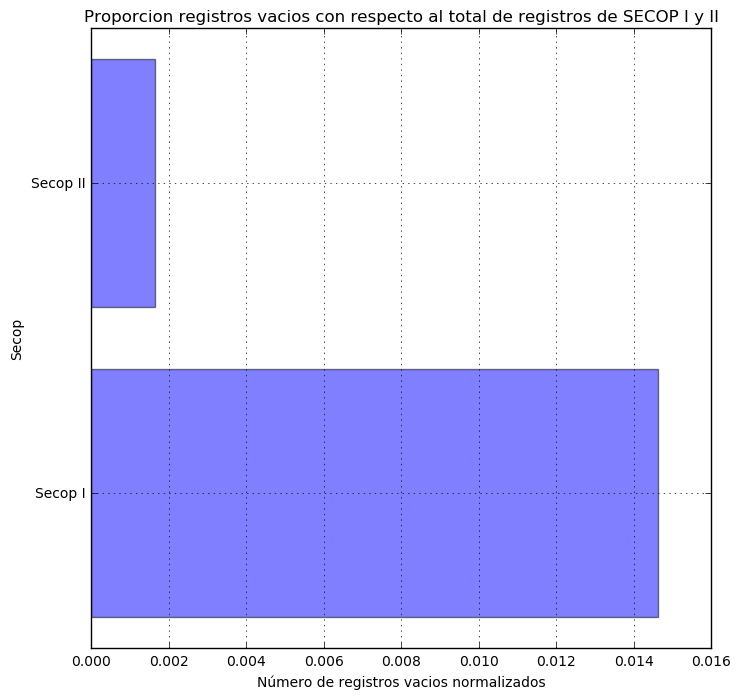

In [33]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,(n_nulls/(n_rows*n_columns)), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Secop')
plt.xlabel('Número de registros vacios normalizados')
plt.title('Proporcion registros vacios con respecto al total de registros de SECOP I y II')
plt.grid()
plt.show()

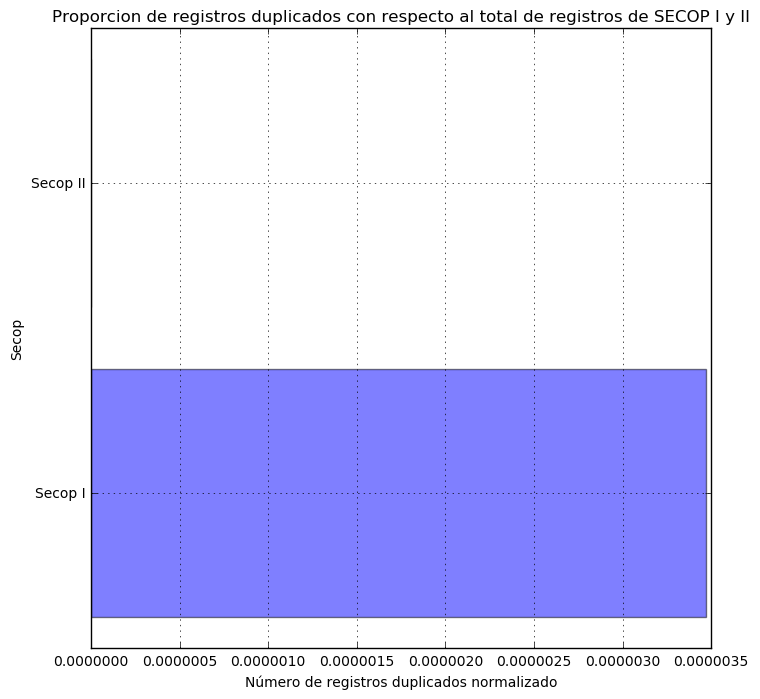

In [34]:
fig = plt.figure(figsize = (8,8))
plt.barh( years,(n_duplicates/(n_rows*n_columns)), align='center',alpha=0.5)
plt.yticks(years,objects)
plt.ylabel('Secop')
plt.xlabel('Número de registros duplicados normalizado')
plt.title('Proporcion de registros duplicados con respecto al total de registros de SECOP I y II')
plt.grid()
plt.show()

In [45]:
string_array = []
string_array.append("Nombre Columna SECOP I                           Vacios SECOP I   Nombre Columna SECOP II  Vacios SECOP II  ")
for i in range(len(nulls_column_SECOP_I)-1):
    line_Secop_I = nulls_column_SECOP_I[i].strip('\n')
    if(i<len(nulls_column_SECOP_II)):
        line_Secop_II = nulls_column_SECOP_II[i].strip('\n')
        #line_Secop_II= (re.findall(r'\d+', line_Secop_II))[0]
    else:
        line_Secop_II = " "
    string_array.append(line_Secop_I + "        "+line_Secop_II )

In [46]:
for line_i in (string_array):
    print (line_i)

Nombre Columna SECOP I                           Vacios SECOP I   Nombre Columna SECOP II  Vacios SECOP II  
 Nivel Entidad                                           0         Entidad Compradora                0
Orden Entidad                                           0        NIT Entidad Compradora            0
Nombre de la Entidad                                    0        ID Proceso                        0
NIT de la Entidad                                       0        ID Solicitud de Proceso           0
ID Tipo de Proceso                                      0        Identificador Operación           0
Estado del Proceso                                      0        Descripción Contrato              0
Causal de Otras Formas de Contratacion Directa          0        Modalidad Contratación            0
ID Regimen de Contratacion                             13        ID Contrato                       0
Regimen de Contratacion                                13        Tipo de Contrato